## read in data

In [1]:
# param
version = 'v20250521'
prop = 'slope'
tgt = 'ts_slope'
space = 'normal'
output_folder = './metric/'

In [2]:
# data
import pandas as pd
import numpy as np
cal = pd.read_parquet(f'./material/srs_cal_{version}.pq')
print(cal.shape)

# covariate
covs = cal.columns[21:-1].values.tolist()
covs.remove('lat')
covs.remove('lon')

(1000, 1010)


## feature selection

In [3]:
from model_fit import cfi_calc
cal = cal.dropna(subset = covs+[tgt])
cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, covs) # produce

start bootstrap on different subset...
[14:24:24] 0 iteration, training size: 700
[14:24:28] 1 iteration, training size: 700
[14:24:32] 2 iteration, training size: 700
[14:24:36] 3 iteration, training size: 700
[14:24:41] 4 iteration, training size: 700
[14:24:45] 5 iteration, training size: 700
[14:24:50] 6 iteration, training size: 700
[14:24:54] 7 iteration, training size: 700
[14:24:59] 8 iteration, training size: 700
[14:25:03] 9 iteration, training size: 700
[14:25:07] 10 iteration, training size: 700
[14:25:12] 11 iteration, training size: 700
[14:25:17] 12 iteration, training size: 700
[14:25:21] 13 iteration, training size: 700
[14:25:25] 14 iteration, training size: 700
[14:25:29] 15 iteration, training size: 700
[14:25:34] 16 iteration, training size: 700
[14:25:38] 17 iteration, training size: 700
[14:25:42] 18 iteration, training size: 700
[14:25:46] 19 iteration, training size: 700


[14:25:51] processing 0.0 ...
[14:26:14] processing 0.0002 ...
[14:26:34] processing 0.0004 ...
[14:26:52] processing 0.0006000000000000001 ...
[14:27:04] processing 0.0008 ...
[14:27:14] processing 0.001 ...
[14:27:22] processing 0.0012000000000000001 ...
[14:27:29] processing 0.0014 ...
[14:27:35] processing 0.0016 ...
[14:27:40] processing 0.0018000000000000002 ...
[14:27:44] processing 0.002 ...
[14:27:48] processing 0.0022 ...
[14:27:52] processing 0.0024000000000000002 ...
[14:27:55] processing 0.0026000000000000003 ...
[14:27:58] processing 0.0028 ...
[14:28:01] processing 0.003 ...
[14:28:03] processing 0.0032 ...
[14:28:06] processing 0.0034000000000000002 ...
[14:28:08] processing 0.0036000000000000003 ...
[14:28:10] processing 0.0038 ...
[14:28:11] processing 0.004 ...
[14:28:13] processing 0.004200000000000001 ...
[14:28:14] processing 0.0044 ...
[14:28:16] processing 0.0046 ...
[14:28:17] processing 0.0048000000000000004 ...
[14:28:18] processing 0.005 ...
[14:28:19] proce

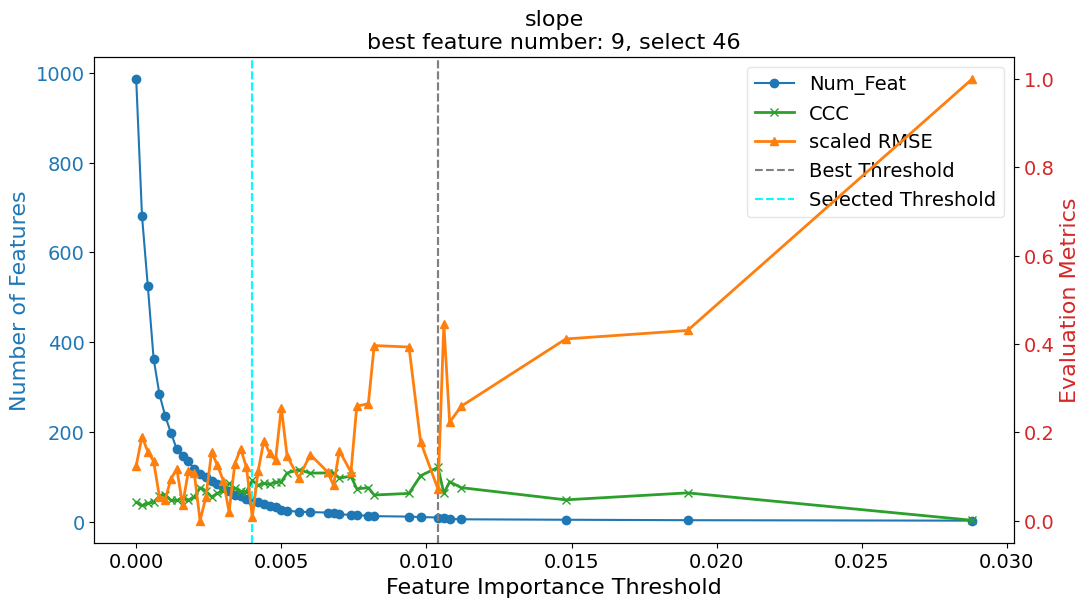

In [4]:
from model_fit import rscfi
cfi = pd.read_csv(f'./metric/feature_cfi_{prop}_{version}.csv')
cov = rscfi(cal, tgt, prop, space, output_folder, version, covs, cfi, [10,50], step_size=0.0002) # produce

## paramter fine-tuning

In [6]:
from model_fit import parameter_fine_tuning, read_features
models, model_names = parameter_fine_tuning(cal, cov, tgt, prop, './model/', version, strata_col=None)

[14:30:43] ----------------------rf------------------------
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 12
max_resources_: 1000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 135
n_resources: 12
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 1
n_candidates: 45
n_resources: 36
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 2
n_candidates: 15
n_resources: 108
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 5
n_resources: 324
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 972
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [7]:
models[0]


RandomForestRegressor(max_depth=30, max_features=0.7, min_samples_leaf=4,
                      n_estimators=64)

In [8]:
len(models[0].feature_names_in_)

46